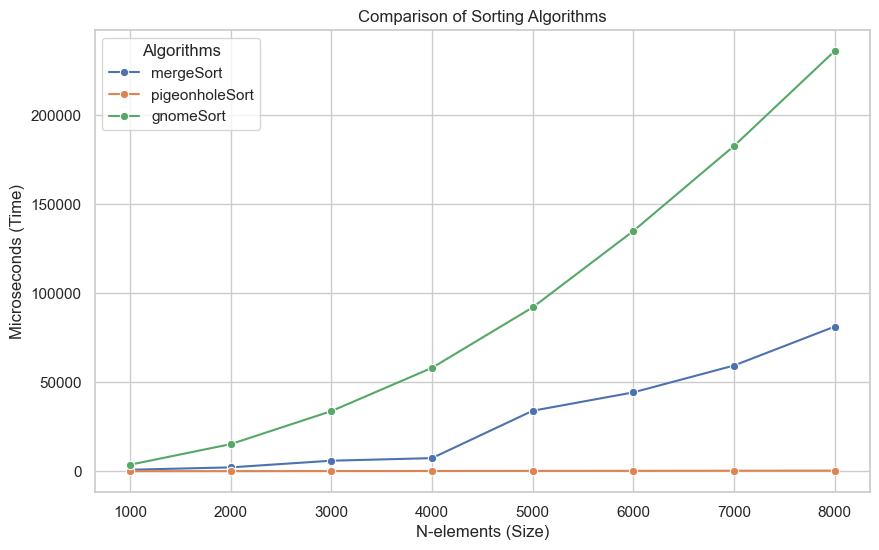

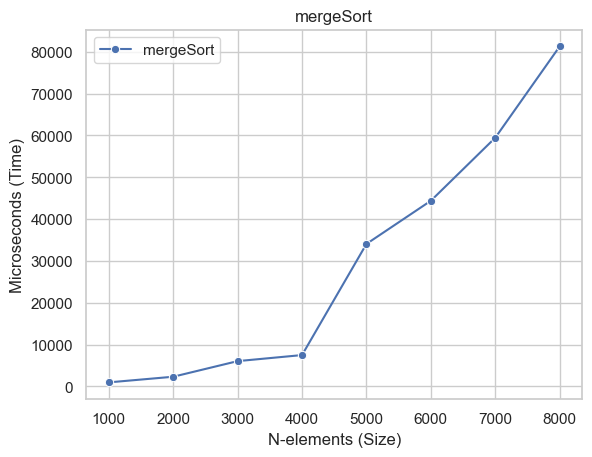

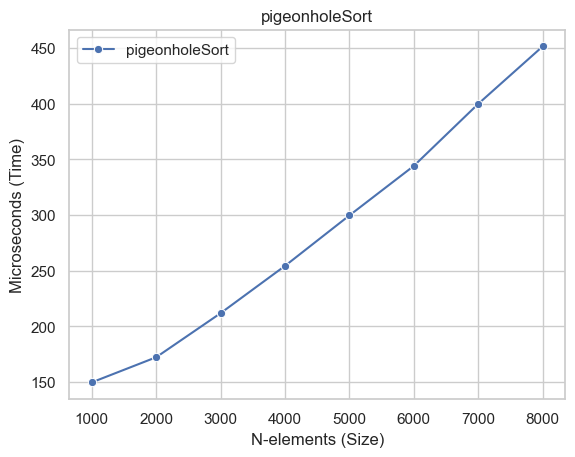

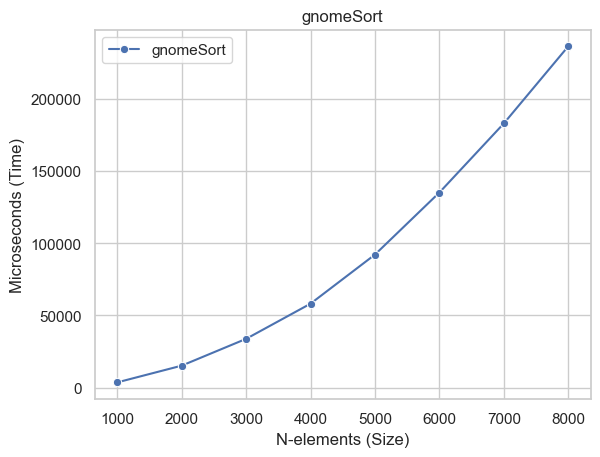

In [19]:
from typing import Dict
import matplotlib.pyplot as plt
import seaborn as sns

def get_dict_of_results(test):
    string_res = "".join(test).split()
    unique_paths = []
    for path in string_res:
        if "txt" in path and path not in unique_paths:
            unique_paths.append(path)
    tests_results = {path: [] for path in unique_paths}
    for num, elem in enumerate(string_res):
        if num % 2 == 0: 
            tests_results[elem].append(string_res[num + 1])
    return tests_results

def calculate_average(data: Dict[str, int]):
    averages = {}
    for key, values in data.items():
        int_values = list(map(int, values))  
        avg = sum(int_values) / len(int_values)  
        averages[key] = avg
    return averages

def show_diff_graphs(dict_of_averages, sorts_paths):
    for idx, average in enumerate(dict_of_averages):
        plt.figure(idx)
        x_values = range(1000, len(average) * 1000 + 1000, 1000)
        y_values = list(average.values())
        sns.lineplot(x=x_values, y=y_values, marker="o", label=sorts_paths[idx][:-4])
        plt.title(f"{sorts_paths[idx][:-4]}")
        plt.xlabel("N-elements (Size)")
        plt.ylabel("Microseconds (Time)")
        plt.legend()
        plt.show()

def show_graph(dict_of_averages, sorts_paths): 
    plt.figure(figsize=(10, 6))   
    sns.set(style="whitegrid")

    for idx, average in enumerate(dict_of_averages):
        y_values = list(average.values())   
        x_values = range(1000, len(average) * 1000 + 1000, 1000)
        sns.lineplot(x=x_values, y=y_values, marker="o", label=sorts_paths[idx][:-4])   

    plt.title("Comparison of Sorting Algorithms")
    plt.xlabel("N-elements (Size)")
    plt.ylabel("Microseconds (Time)")
    plt.legend(title="Algorithms")
    plt.show()

sorts_paths = ["mergeSort.txt", "pigeonholeSort.txt", "gnomeSort.txt"]
tests = []

for path in sorts_paths:
    with open(path) as file:
        tests.append(file.read())

list_of_dict_of_results = []
for test in tests:
    list_of_dict_of_results.append(get_dict_of_results(test))
    
dict_of_averages = []
for dict_res in list_of_dict_of_results:
    dict_of_averages.append(calculate_average(dict_res))

show_graph(dict_of_averages, sorts_paths)
show_diff_graphs(dict_of_averages, sorts_paths)


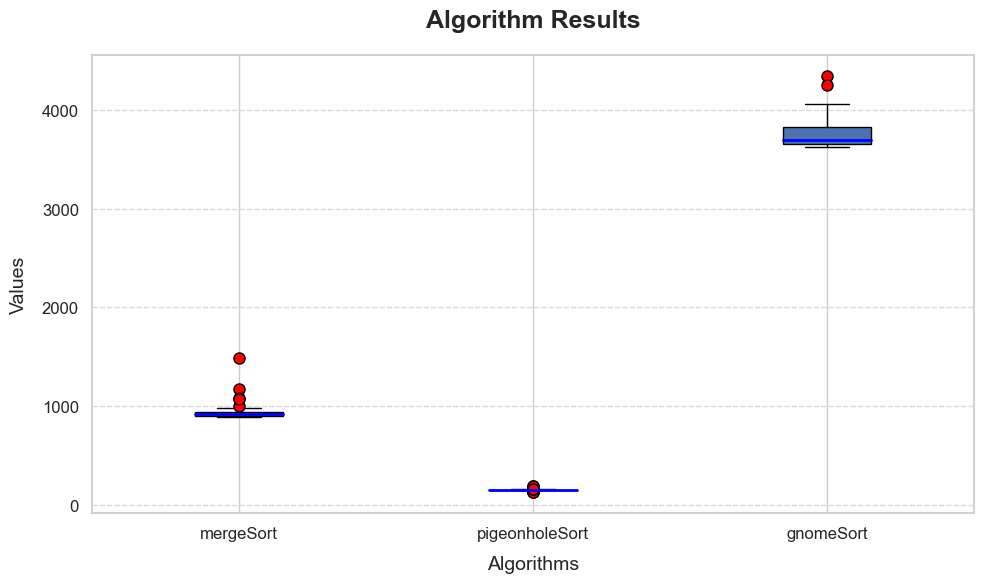

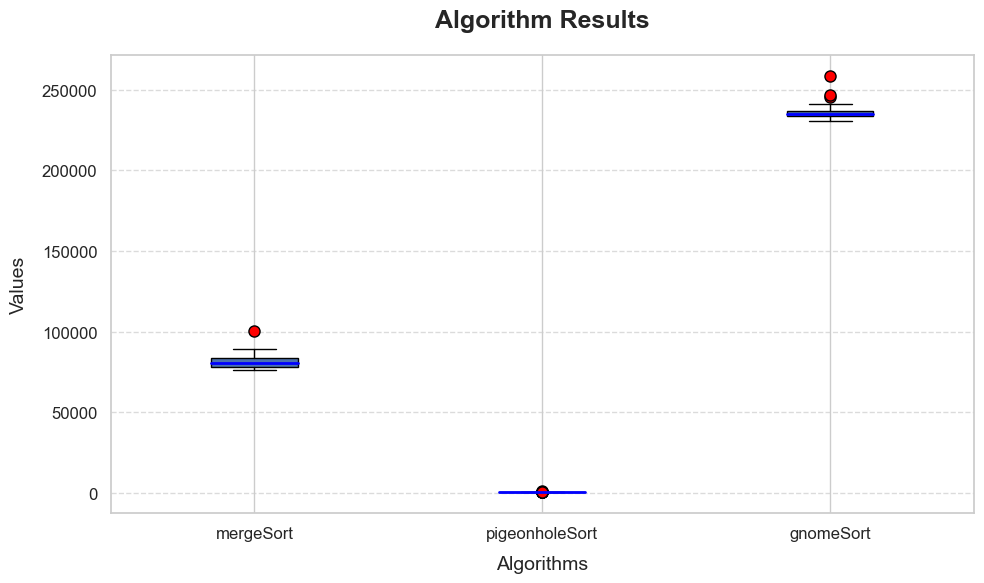

In [64]:
def show_boxplot(list_of_dict_of_results, sorts_paths, elem):
    d = []
    for dict_res in list_of_dict_of_results:
        keys = list(dict_res.keys())
        integer_res = list(map(int, dict_res[keys[elem]]))
        d.append(integer_res)

    sns.set_theme(style="whitegrid")   
    plt.figure(figsize=(10, 6))  
    box = plt.boxplot(
        d,
        labels=list(map(lambda x: x[:-4], sorts_paths)),   
        patch_artist=True, 
        flierprops=dict(markerfacecolor='red', marker='o', markersize=8),  
        medianprops=dict(color="blue", linewidth=2)   
    )

    plt.title("Algorithm Results", fontsize=18, fontweight='bold', pad=20)
    plt.xlabel("Algorithms", fontsize=14, labelpad=10)
    plt.ylabel("Values", fontsize=14, labelpad=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
show_boxplot(list_of_dict_of_results, sorts_paths, 0)
show_boxplot(list_of_dict_of_results, sorts_paths, -1)

